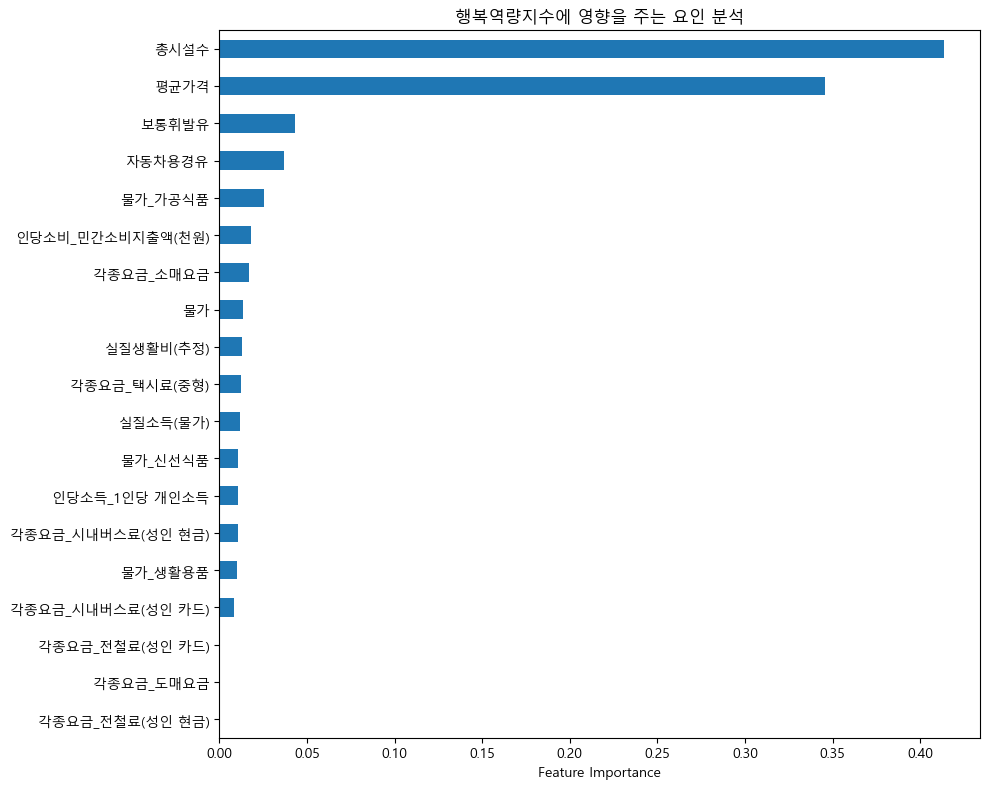

총시설수                0.413515
평균가격                0.345748
보통휘발유               0.043162
자동차용경유              0.036825
물가_가공식품             0.025374
인당소비_민간소비지출액(천원)    0.017839
각종요금_소매요금           0.016792
물가                  0.013240
실질생활비(추정)           0.013167
각종요금_택시료(중형)        0.012277
dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# 한글 폰트 설정 (Windows 사용자용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 데이터 불러오기
df_happiness = pd.read_csv('시도_구군_병합_행복역량지수.csv', encoding='utf-8')
df_welfare = pd.read_csv('시도_시군구_병합_사회복지시설.csv', encoding='utf-8')
df_living = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 지역 기준 병합
df = df_happiness.merge(df_welfare, on='지역', how='left')
df = df.merge(df_living, left_on='지역', right_on='기준지역', how='left')

# 숫자형 데이터만 선택
df_numeric = df.select_dtypes(include='number').dropna()

# 입력(X)와 출력(y) 설정
X = df_numeric.drop(columns=['행복역량지수'])
y = df_numeric['행복역량지수']

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 특성 중요도 시리즈 생성 및 시각화
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('행복역량지수에 영향을 주는 요인 분석')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

# 상위 10개 요인 출력
print(importances.sort_values(ascending=False).head(10))


평균 MSE (평균 제곱 오차): 0.0056
평균 R² (결정 계수): -0.0231


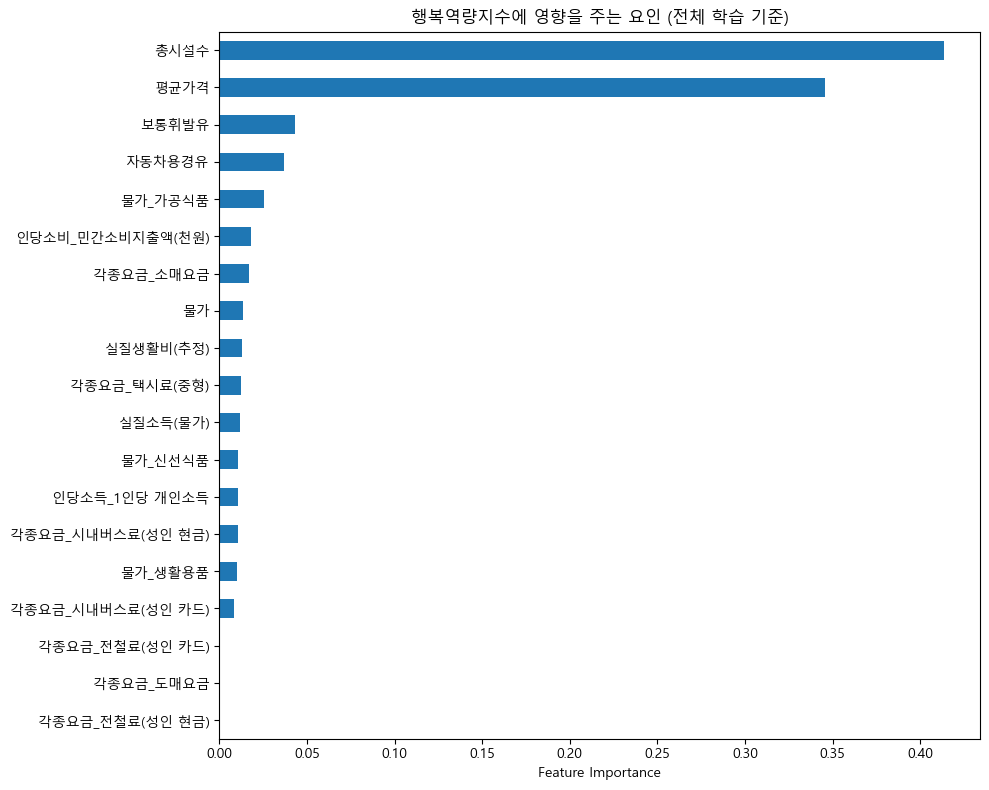

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df_happiness = pd.read_csv('시도_구군_병합_행복역량지수.csv', encoding='utf-8')
df_welfare = pd.read_csv('시도_시군구_병합_사회복지시설.csv', encoding='utf-8')
df_living = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 2. 병합
df = df_happiness.merge(df_welfare, on='지역', how='left')
df = df.merge(df_living, left_on='지역', right_on='기준지역', how='left')

# 3. 숫자형 데이터만 추출 (결측 제거)
df_numeric = df.select_dtypes(include='number').dropna()
X = df_numeric.drop(columns=['행복역량지수'])
y = df_numeric['행복역량지수']

# 4. K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

# 5. 교차 검증 반복
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

# 6. 결과 출력
print(f"평균 MSE (평균 제곱 오차): {np.mean(mse_list):.4f}")
print(f"평균 R² (결정 계수): {np.mean(r2_list):.4f}")

# 7. 특성 중요도 시각화
model.fit(X, y)  # 전체 데이터로 다시 학습
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('행복역량지수에 영향을 주는 요인 (전체 학습 기준)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


전국 단위로 분석을 해보았더니 정확도가 매우 낮게 나왔다. 그리하여 상관관계 분석으로 유의미한 변수만 찾아보기로 한다.

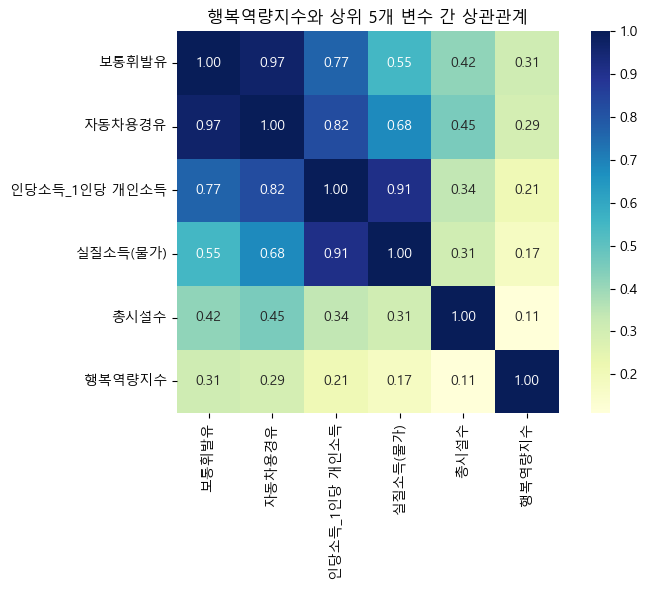

행복역량지수와의 상위 상관 변수:
보통휘발유            0.307808
자동차용경유           0.294904
인당소득_1인당 개인소득    0.208632
실질소득(물가)         0.174670
총시설수             0.109227
Name: 행복역량지수, dtype: float64


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df_happiness = pd.read_csv('시도_구군_병합_행복역량지수.csv', encoding='utf-8')
df_welfare = pd.read_csv('시도_시군구_병합_사회복지시설.csv', encoding='utf-8')
df_living = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 2. 병합
df = df_happiness.merge(df_welfare, on='지역', how='left')
df = df.merge(df_living, left_on='지역', right_on='기준지역', how='left')

# 3. 숫자형 데이터만 추출 및 결측 제거
df_numeric = df.select_dtypes(include='number').dropna()

# 4. 상관계수 계산
correlation_matrix = df_numeric.corr()

# 5. 행복역량지수와의 상관계수만 추출하고 정렬
top_corr = correlation_matrix['행복역량지수'].drop('행복역량지수').abs().sort_values(ascending=False).head(5)
top_features = top_corr.index.tolist() + ['행복역량지수']

# 6. 상위 변수만 뽑아서 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric[top_features].corr(), annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title('행복역량지수와 상위 5개 변수 간 상관관계')
plt.tight_layout()
plt.show()

# 7. 상관계수 출력
print("행복역량지수와의 상위 상관 변수:")
print(top_corr)


일반적인 통념에 따르면 개인 소득이나 소비 등이 행복도와 관련이 깊다고 생각이 들기 마련인데, 해당 분석들을 통해 예상외로 관련이 없다는 것을 알게 되었다. 그러나 행복도가 아닌 자신의 지역에 대한 만족도로 비교를 해본다면 어떨지 추가로 살펴보았다.

평균 MSE (평균 제곱 오차): 0.0888
평균 R² (결정 계수): -0.1087


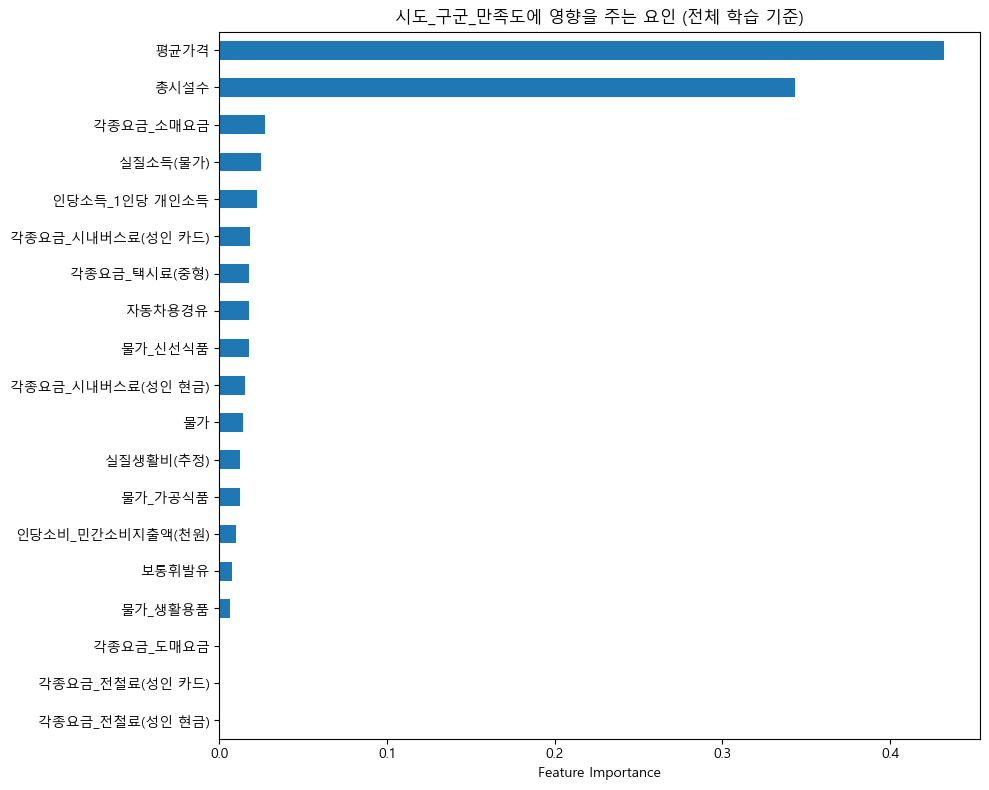

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# 1. 데이터 불러오기
df_happiness = pd.read_csv('시도_구군_병합_만족도.csv', encoding='utf-8')
df_welfare = pd.read_csv('시도_시군구_병합_사회복지시설.csv', encoding='utf-8')
df_living = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 2. 병합
df = df_happiness.merge(df_welfare, on='지역', how='left')
df = df.merge(df_living, left_on='지역', right_on='기준지역', how='left')

# 3. 숫자형 데이터만 추출 (결측 제거)
df_numeric = df.select_dtypes(include='number').dropna()
X = df_numeric.drop(columns=['삶의 만족도'])
y = df_numeric['삶의 만족도']

# 4. K-Fold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

# 5. 교차 검증 반복
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mse_list.append(mse)
    r2_list.append(r2)

# 6. 결과 출력
print(f"평균 MSE (평균 제곱 오차): {np.mean(mse_list):.4f}")
print(f"평균 R² (결정 계수): {np.mean(r2_list):.4f}")

# 7. 특성 중요도 시각화
model.fit(X, y)  # 전체 데이터로 다시 학습
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()

plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('시도_구군_만족도에 영향을 주는 요인 (전체 학습 기준)')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()


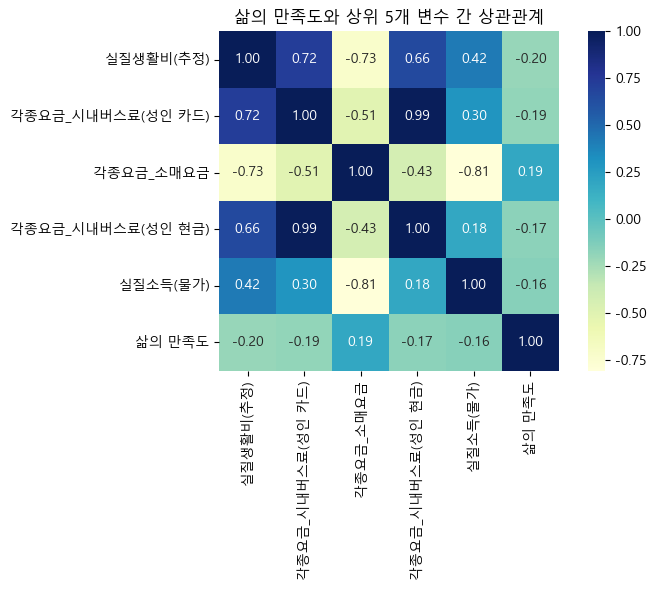

삶의 만족도와의 상위 상관 변수:
실질생활비(추정)            0.204971
각종요금_시내버스료(성인 카드)    0.187699
각종요금_소매요금            0.185507
각종요금_시내버스료(성인 현금)    0.168897
실질소득(물가)             0.155324
Name: 삶의 만족도, dtype: float64


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df_happiness = pd.read_csv('시도_구군_병합_만족도.csv', encoding='utf-8')
df_welfare = pd.read_csv('시도_시군구_병합_사회복지시설.csv', encoding='utf-8')
df_living = pd.read_csv('실질_생활비_소득_분석_결과_최종.csv', encoding='utf-8')

# 2. 병합
df = df_happiness.merge(df_welfare, on='지역', how='left')
df = df.merge(df_living, left_on='지역', right_on='기준지역', how='left')

# 3. 숫자형 데이터만 추출 및 결측 제거
df_numeric = df.select_dtypes(include='number').dropna()

# 4. 상관계수 계산
correlation_matrix = df_numeric.corr()

# 5. 행복역량지수와의 상관계수만 추출하고 정렬
top_corr = correlation_matrix['삶의 만족도'].drop('삶의 만족도').abs().sort_values(ascending=False).head(5)
top_features = top_corr.index.tolist() + ['삶의 만족도']

# 6. 상위 변수만 뽑아서 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric[top_features].corr(), annot=True, fmt=".2f", cmap='YlGnBu', square=True)
plt.title('삶의 만족도와 상위 5개 변수 간 상관관계')
plt.tight_layout()
plt.show()

# 7. 상관계수 출력
print("삶의 만족도와의 상위 상관 변수:")
print(top_corr)


삶의 만족도를 기준으로 한다면 더 관계가 없는 것으로 드러났다.